# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.6, palette='summer')
%matplotlib inline

Следующие три пункта этой задачи повторяются в плане логики и написании кода, поэтому, чобы избежать копипаста, неплохо бы запихать их в отдельные функции

In [2]:
def generate_z_jn(distribution, size_pr = 300, samples_count = 500):
    """
    Функция по распределению возвращает Z_{jn} 
    """
    size = (samples_count, size_pr)
    
    if distribution == 'expon':
        samples = sps.expon.rvs(size = size)
        return (samples.cumsum(axis = 1) - (np.arange(size_pr) + 1))/np.sqrt((np.arange(size_pr) + 1))
    elif distribution == 'uniform':
        samples = sps.uniform.rvs(size = size)
        return (samples.cumsum(axis = 1) - (np.arange(size_pr) + 1)*0.5)/np.sqrt((np.arange(size_pr) + 1)/12)
    elif distribution == 'poisson':
        mu = 1
        samples = sps.poisson.rvs(mu = mu, size = size)
        return (samples.cumsum(axis = 1) - (np.arange(size_pr) + 1))/np.sqrt((np.arange(size_pr) + 1))
        
    

In [3]:
def draw_plot(z_jn, 
              color='green', 
              alpha = 0.05, 
              size_pr = 300, 
              samples_count = 500, 
              figsize=(15, 7)):
    
    """Рисует зависимость Z_{jn}(n)"""
    plt.figure(figsize=figsize)

    # рисуем для каждой выборки отдельно
    for i in range(samples_count):
        plt.plot(np.arange(size_pr) + 1, 
                 z_jn[i], 
                 color=color,
                 alpha = alpha)

    plt.grid(ls=':')
    plt.xlabel('Количество случайных величин')
    plt.ylabel(r'$Z_{jn}$')
    plt.show()
    None

In [4]:
def draw_histogramm(array,
                    left = -3, 
                    right = 3, 
                    num = 500, 
                    figsize = (15, 7)):
    
    """Рисует гистограмму по массиву array и плотность нормального распределения на одном графике"""
    grid = np.linspace(left, right, num = num)

    plt.figure(figsize = figsize)
    plt.hist(array,
             density = True,
             label = r'Гистограмма $Z_{:,n}$')

    plt.plot(grid,
             sps.norm.pdf(grid),
             lw = 3,
             color = 'blue',
             label = r'График плотности $\mathcal{N}(0, 1)$'
            )

    plt.legend()
    plt.grid(ls=':')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    plt.show()
    None

In [5]:
size_pr = 300  # количество случайных величин
samples_count = 500  # количество выборок

z_jn = generate_z_jn(distribution='expon')

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

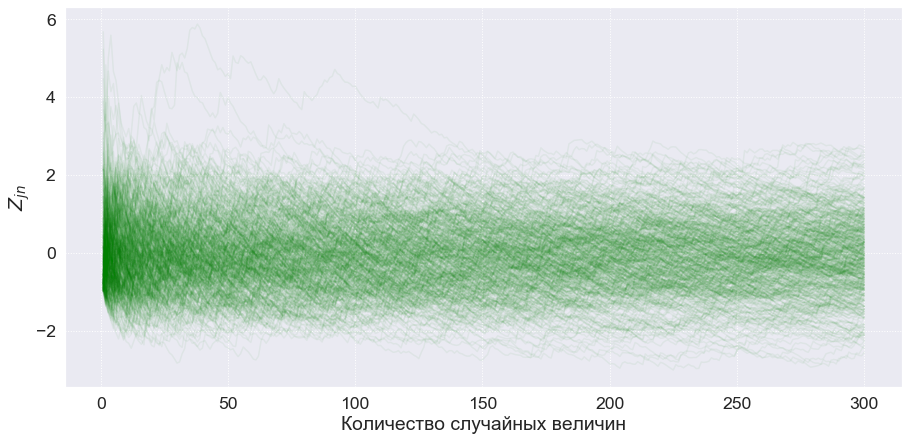

In [6]:
draw_plot(z_jn)

Я бы не сказал, что они сходятся к какой-то константе, скорее кучкуются ближе к нулю, что понятно, ведь по цпт(хоть мы его пока не знаем и доказываем этот факт, но навреное на это можно сослаться) вероятность этих случайных величин попасть в ноль больше чем в остальные, но это не есть сходимость к константе.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

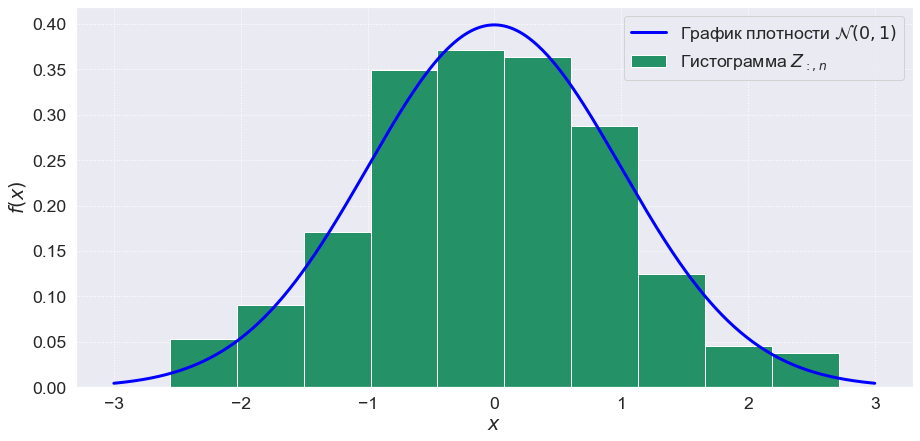

In [7]:
draw_histogramm(z_jn[:, 299])

Да, видно, что похожа

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

Распределение $U(0, 1)$.

In [8]:
size_pr = 300  # количество случайных величин
samples_count = 500  # количество выборок

z_jn = generate_z_jn(distribution='uniform')

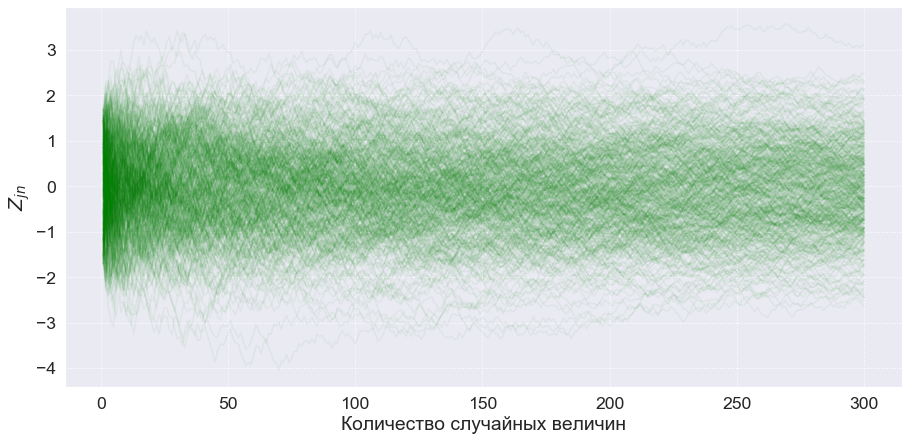

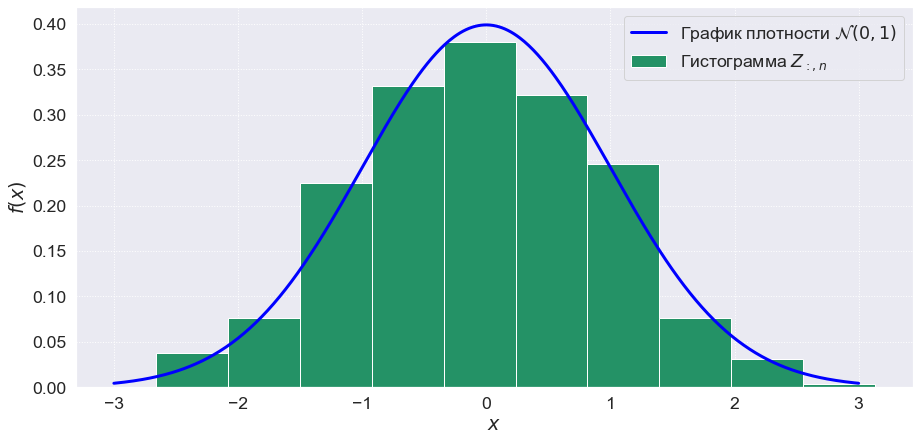

In [9]:
draw_plot(z_jn)
draw_histogramm(z_jn[:, 299])

Распределение $Pois(1)$.

In [10]:
size_pr = 300  # количество случайных величин
samples_count = 500  # количество выборок

z_jn = generate_z_jn(distribution='poisson')

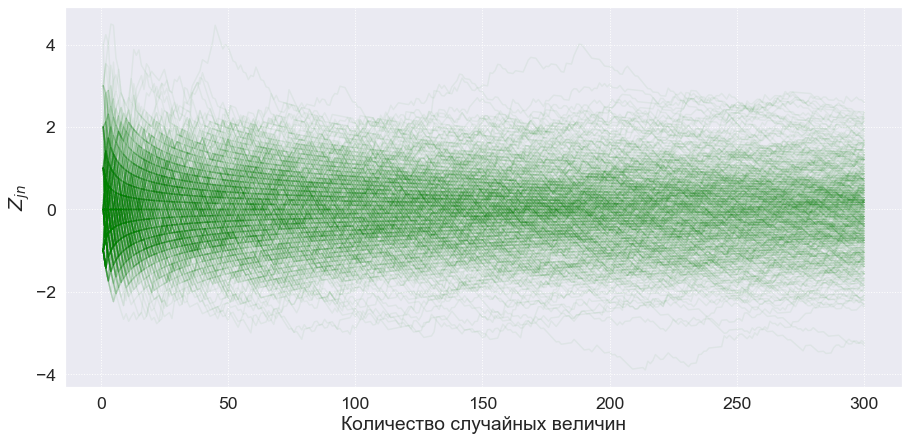

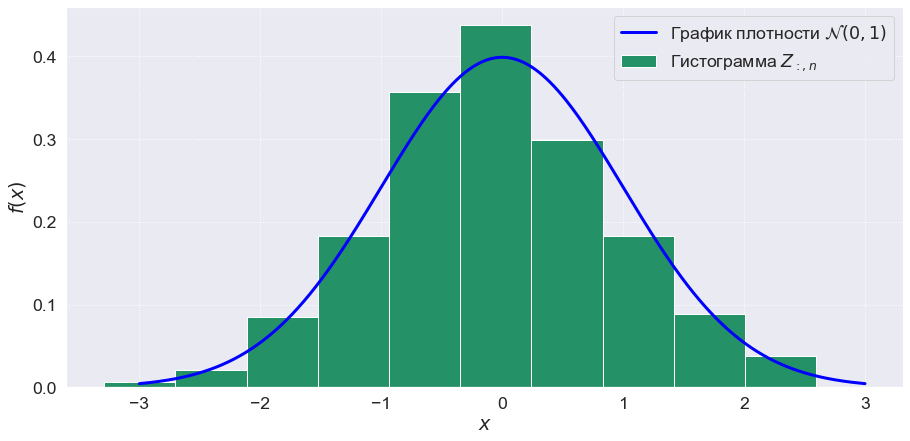

In [11]:
draw_plot(z_jn)
draw_histogramm(z_jn[:, 299])

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

Видно, что уже плотность хорошо описывает построенную гистограмму. Если бы мы взяли больше количество сулчайных величин и по хорошему больше эксперементов и значит соответсвенно больше реализаций этой случайной величины, то мы бы получили более точное описание нормального распрделение, что и соответствует ЦПТ.

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

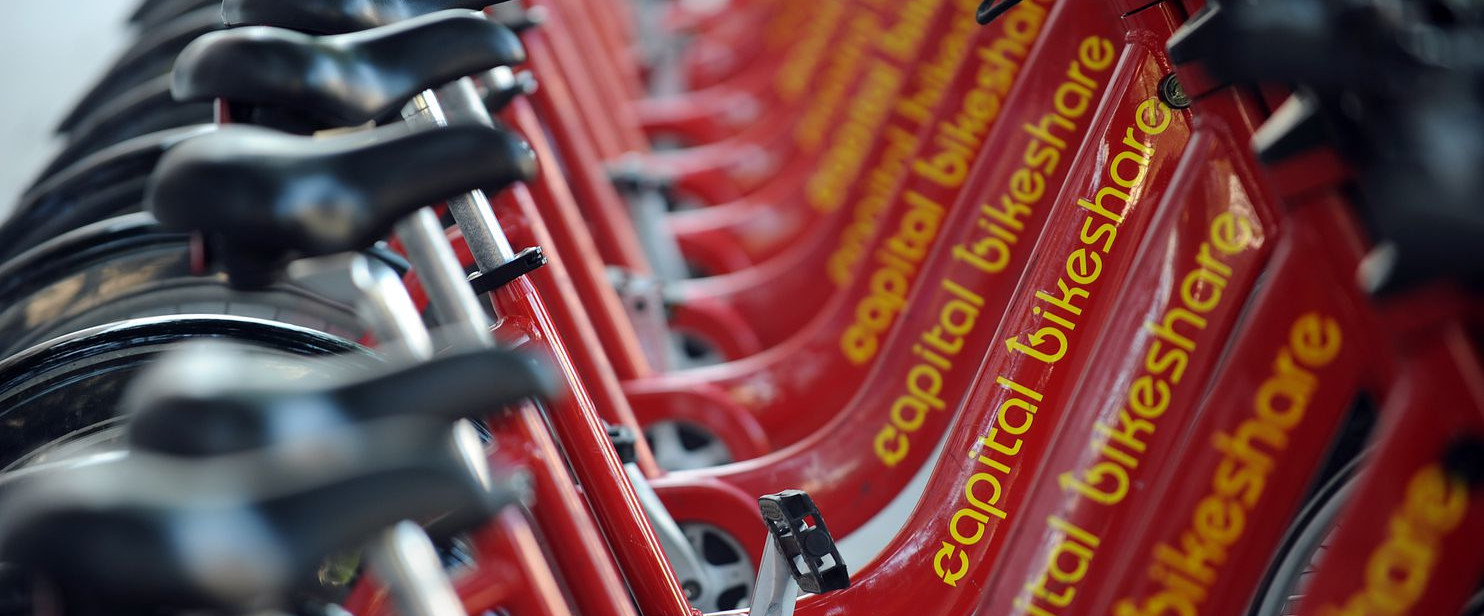

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups

In [13]:
data = pd.read_csv('day.csv')

num_columns = ['temp', 'atemp',
               'hum', 'windspeed']
cat_columns = ['season','mnth', 'holiday', 'weekday', 
               'workingday', 'weathersit']
target_col = 'cnt'

X_train, X_test, y_train, y_test = train_test_split(data[num_columns + cat_columns],
                                                    data[[target_col]], 
                                                    test_size=0.2)

Проверим, что в данных нет пропусков

In [14]:
data.isna().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных. 

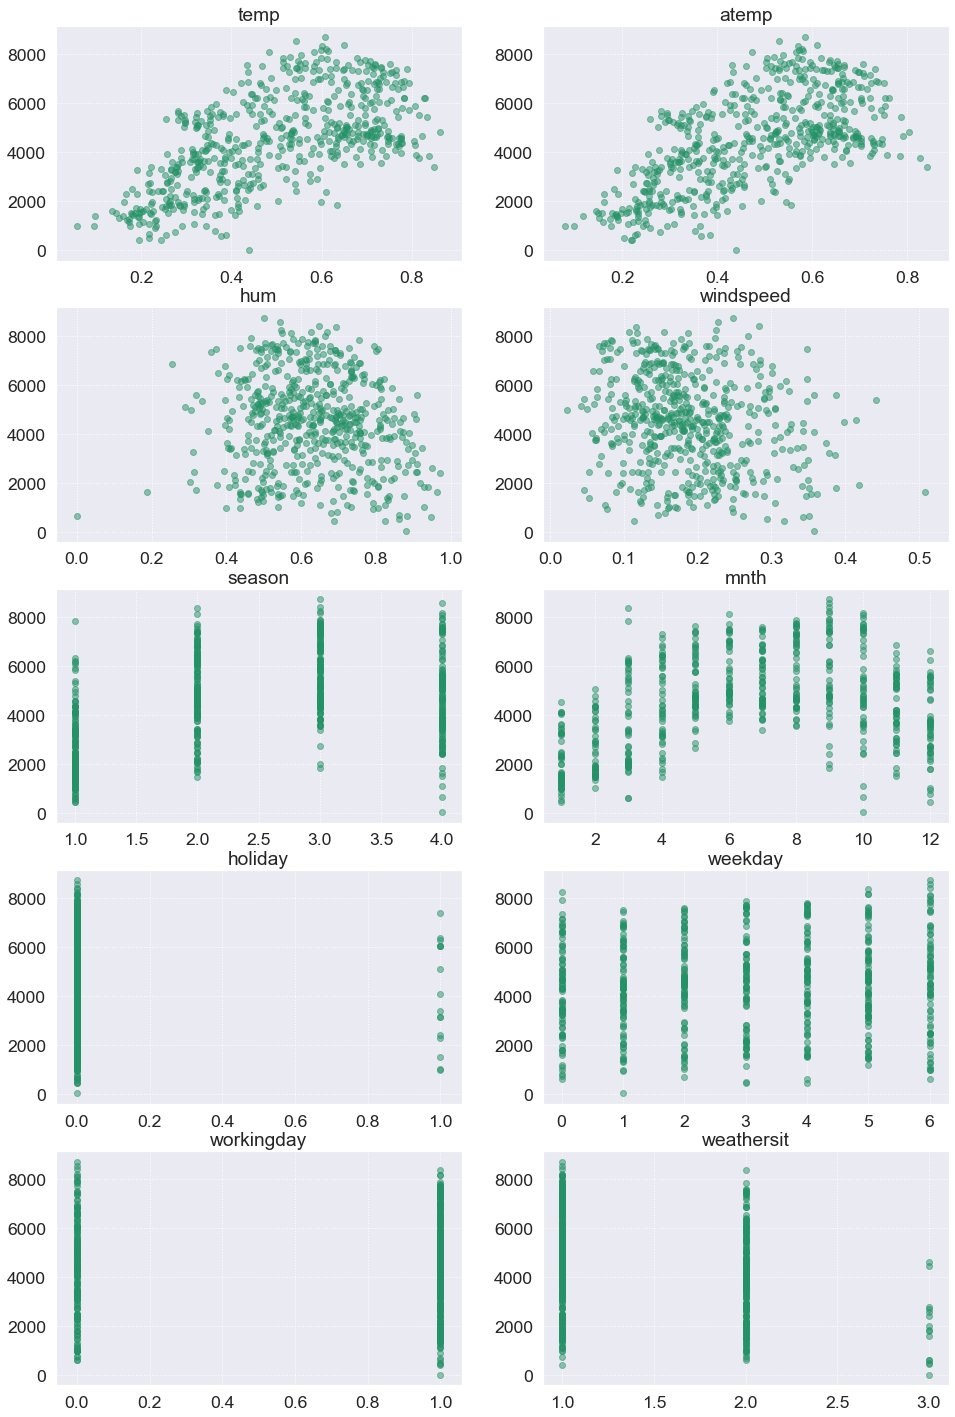

In [15]:
plt.figure(figsize=(16,25))

n = 1
for i in X_train.columns:
    plt.subplot(5, 2, n)
    n += 1
    plt.scatter(X_train[i], y_train, alpha = 0.5)
    plt.grid(ls=':')
    plt.title(i)

plt.show()

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

Видно, что категориальными являются следующие признаки: `season, mnth, holiday, weekday, workingday, weathersit`. Собственно это было понятно еще в описании датасета, поэтому я их сразу в первой ячейке кода отделил. Кажется, логично обработать наши категориальные признаки с помощью  `OneHotEncoder`, потому что к примеру при обучении нам будет важен какой именно месяц, а не его порядок в календаре и веса как раз подстроятся на конкретный месяц.

Посмотрим также на распределение фичей

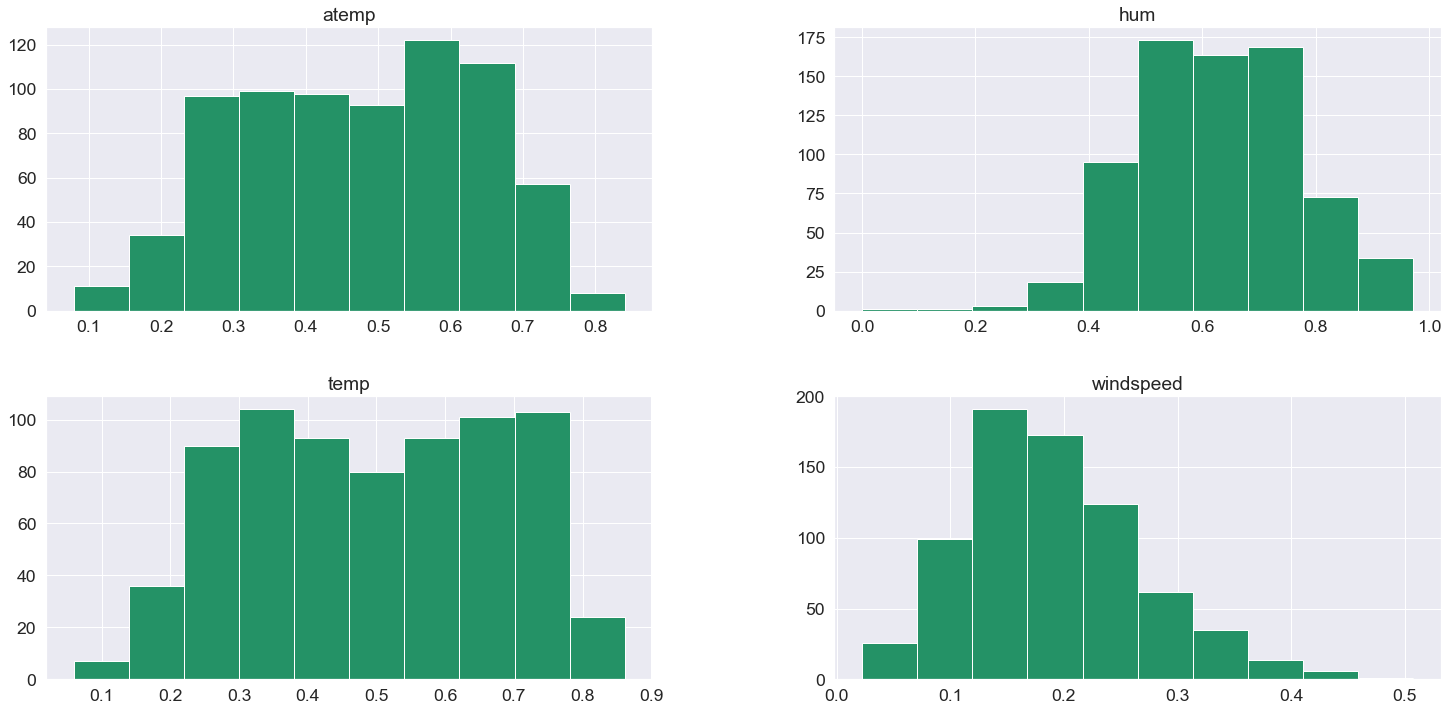

In [16]:
data[num_columns].hist(figsize = (25,12))
None

Думал вначале применить стандартное масштабирование численных признаков, но как мы видим temp очень похоже двумодально распределена, с atemp не очень понятно. Поэтому сделаем MinMaxScaler. Категориальные признаки масштабировать не стоит, потому что умные люди с хабра не советуют так делать: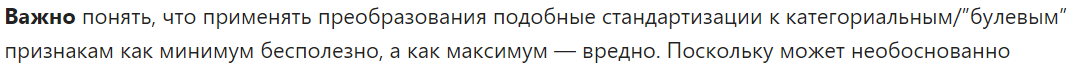
Ну и кажется, что это довольно логично, потому что после MinMaxScaler у нас все признаки будут распрделены в 0-1, а OneHotEncoder как раз так и расставляет категориальные признаки.

In [17]:
features = X_train[num_columns]
pca = MinMaxScaler()
X_train[num_columns] = pca.fit_transform(features.values)

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(X_train[cat_columns])  # обучаем и кодируем
X_train = np.hstack([X_train[num_columns], train_cat])

None

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Коэффициенты: {}\n'.format(model.coef_[0]))
print('Свободный член: {}'.format(*model.intercept_))

Коэффициенты: [   96.28852466  5906.88543331 -3430.92307087 -1450.12097477
   550.43172337   677.90343107  1240.57895544  -104.45049919
   271.64042167   190.09892158   260.50878514  -396.13316361
 -1142.65129711  -286.03637625   591.18717912   336.79201046
    74.84824957   197.16740471  -195.11149307  -156.15704597
    74.93906654    77.3506677     33.28583105    19.8715162
   466.47895661   244.40152858  -145.72117414 -1931.80103074]

Свободный член: 3322.69935847491


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

Сделаем те же преобразования с тестовыми данными

In [19]:
X_test[num_columns] = pca.transform(X_test[num_columns].values)
train_cat = encoder.transform(X_test[cat_columns])  
X_test = np.hstack([X_test[num_columns], train_cat])
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

test_preds = model.predict(X_test)

print('RMSE: {:.3f}'.format(metrics.mean_squared_error(test_preds, y_test)**0.5))
print('MAE: {:.3f}'.format(metrics.mean_absolute_error(test_preds, y_test)))
print('MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, test_preds)))

RMSE: 1452.742
MAE: 1243.455
MAPE: 41.043


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Добавим единичный столбец для свободного члена и напишем формулу

In [20]:
nX_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
estimate = (np.linalg.inv(nX_train.T @ nX_train) @ nX_train.T @ y_train)
print('Коэффициенты: {}\n'.format(estimate[:28]))
print('Свободный член: {}'.format(estimate[28]))

Коэффициенты: [[ 4.53079731e+05]
 [-4.41111147e+05]
 [-4.69304107e+03]
 [-3.27809677e+03]
 [ 4.16641867e+03]
 [ 6.71231012e+03]
 [ 2.41975688e+02]
 [-1.73398229e+03]
 [-3.16364742e+02]
 [-2.33805277e+03]
 [-6.88645599e+03]
 [-9.58537435e+03]
 [-1.59248919e+04]
 [-1.49989295e+04]
 [-1.37759312e+04]
 [ 1.59968950e+03]
 [-1.27745053e+03]
 [ 1.73757973e+03]
 [-3.52243504e+04]
 [ 5.84764523e+04]
 [ 4.18359680e+04]
 [ 5.81415344e+04]
 [ 5.20520035e+04]
 [ 5.81245130e+04]
 [ 4.66478957e+02]
 [-4.94512423e+04]
 [-1.45721174e+02]
 [-1.93180103e+03]]

Свободный член: [3322.69935848]


Мы видим, что некоторые коэффициенты совпали, но многие нет. Как подсказывает условие в задаче и вообще логично в этот предложить, что у нас есть мультиколлинеарность между признаками, на это намекает как минимум растущие веса. Неплохо было бы это проверить и вообще посмотреть как признаки себя ведут по сравнению друг с другом. Вообще, насколько я знаю, хорошо бы это делать еще до разделения и подготовки данных.

In [21]:
data[num_columns + cat_columns].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,temp,atemp,hum,windspeed,season,mnth,holiday,weekday,workingday,weathersit
temp,1.00,0.99,0.13,-0.16,0.33,0.22,-0.03,-0.00,0.05,-0.12
atemp,0.99,1.00,0.14,-0.18,0.34,0.23,-0.03,-0.01,0.05,-0.12
hum,0.13,0.14,1.00,-0.25,0.21,0.22,-0.02,-0.05,0.02,0.59
windspeed,-0.16,-0.18,-0.25,1.00,-0.23,-0.21,0.01,0.01,-0.02,0.04
season,0.33,0.34,0.21,-0.23,1.00,0.83,-0.01,-0.00,0.01,0.02
mnth,0.22,0.23,0.22,-0.21,0.83,1.00,0.02,0.01,-0.01,0.04
holiday,-0.03,-0.03,-0.02,0.01,-0.01,0.02,1.00,-0.10,-0.25,-0.03
weekday,-0.00,-0.01,-0.05,0.01,-0.00,0.01,-0.10,1.00,0.04,0.03
workingday,0.05,0.05,0.02,-0.02,0.01,-0.01,-0.25,0.04,1.00,0.06
weathersit,-0.12,-0.12,0.59,0.04,0.02,0.04,-0.03,0.03,0.06,1.00


Как мы видим, есть явная зависимость между `atemp` и `temp`, также между `season` и `month`, что довольно логично, ведь эти фичи по своей логике похожи. Также между `weathersit` и `hum`. Изначально я думал решать эту проблему с помощью регуляризации, но видимо, это задача номер 6, поэтому в этом пункте, думаю пойти другим путем. Попробуем удалить неинформативные и дублирующие по своей сути фичи. 

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Итак удалим `atemp`, `season` и `weathersit`, а также `workingday`, так как логично, что он определяется от `holiday` и `weekday`, а значит зависит от них.

In [22]:
num_columns = ['temp', 'hum', 'windspeed']
cat_columns = ['mnth', 'holiday', 'weekday']
target_col = 'cnt'

X_train, X_test, y_train, y_test = train_test_split(data[num_columns + cat_columns], 
                                                    data[[target_col]], 
                                                    test_size = 0.2)

In [23]:
features = X_train[num_columns]
pca = MinMaxScaler()
X_train[num_columns] = pca.fit_transform(features.values)

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(X_train[cat_columns])  # обучаем и кодируем
X_train = np.hstack([X_train[num_columns], train_cat])

None

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Коэффициенты: {}\n'.format(model.coef_[0]))
print('Свободный член: {}'.format(*model.intercept_))

Коэффициенты: [ 5274.22267712 -4142.50619172 -2517.87774412    64.17193892
   593.26528951   841.70661151  1136.72365268   450.96528464
  -197.8421841    444.82339579  1371.48255843  1849.27225305
  1266.39163691   912.95058784  -799.41897592    59.22029868
   151.82715449   248.56252682    75.63861253   227.98180236
   211.31712815]

Свободный член: 4336.462558961309


In [25]:
X_test[num_columns] = pca.transform(X_test[num_columns].values)
train_cat = encoder.transform(X_test[cat_columns])  
X_test = np.hstack([X_test[num_columns], train_cat])

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
test_preds = model.predict(X_test)

print('RMSE: {:.3f}'.format(metrics.mean_squared_error(test_preds, y_test)**0.5))
print('MAE: {:.3f}'.format(metrics.mean_absolute_error(test_preds, y_test)))
print('MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_preds, y_test)))

RMSE: 1322.950
MAE: 1114.469
MAPE: 27.652


In [26]:
nX_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
estimate = (np.linalg.inv(nX_train.T @ nX_train) @ nX_train.T @ y_train)
print('Коэффициенты: {}\n'.format(estimate[:21]))
print('Свободный член: {}'.format(estimate[21]))

Коэффициенты: [[ 5274.22267712]
 [-4142.50619172]
 [-2517.87774412]
 [   64.17193892]
 [  593.26528951]
 [  841.70661151]
 [ 1136.72365268]
 [  450.96528464]
 [ -197.8421841 ]
 [  444.82339579]
 [ 1371.48255843]
 [ 1849.27225305]
 [ 1266.39163691]
 [  912.95058784]
 [ -799.41897592]
 [   59.22029868]
 [  151.82715449]
 [  248.56252682]
 [   75.63861253]
 [  227.98180236]
 [  211.31712815]]

Свободный член: [4336.46255896]


Сделайте выводы.

Как мы видим коэффициенты и свободный член, они все совпали, что не может не радовать. В общем эта задача показывает, насколько больно получать мультиколлинеарные признаки и один из способов удалить зависимые фичи, но проблема в том, что не всегда они в таком явном виде зависят друг от друга, как у нас, и вторая проблема заключается в том, что удаляя данные мы оставляем меньше данных на обучение модели, что плохо, ведь модель может в конечном итоге что-то не учитывать, поэтому все же лучше делать регуляризацию. Но это уже задача 6 и так как я уже ее решил, то спойлер там значения ошибок оказываются меньше, чем в нашей модели, что как раз и пожтвеждает, что лучше не удалять данные, только если фичи прям уж совсем не копируют друг друга.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
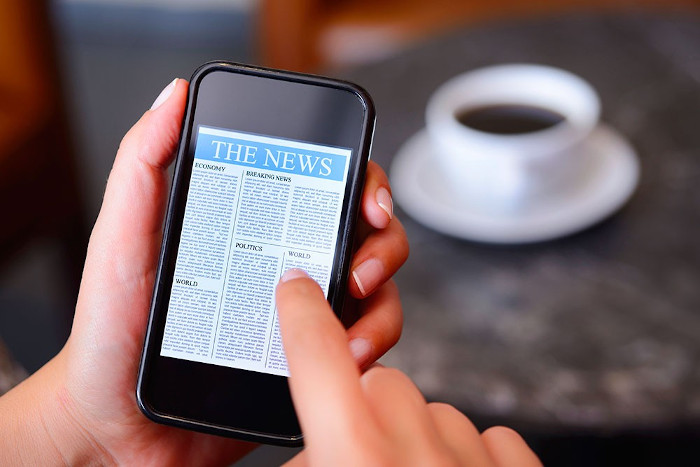



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [27]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [28]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [29]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [30]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Сделаем привычный нам DataFrame

In [31]:
X = pd.DataFrame({'data' : data_train['data'],
                  'target' : data_train['target']
                 })
X_test = pd.DataFrame({'data' : data_test['data'],
                       'target' : data_test['target']
                      })

X_train, X_validate = train_test_split(X, test_size = 0.2)

X_train.head()

,data,target
10054,In article <1993Apr20.213819.664@vms.huji.ac.i...,17
8702,What is the directory .X11-unix for in /tmp? W...,5
10312,Could some one please send me (or tell me wher...,5
6713,"Hi all,\n\nI just got a La Cie 240 meg externa...",4
3870,Showing a meaningless (relatively) baseball ga...,10


#### Предобработка данных.

Впринципе `target` уже готов и нам не надо работать обрабатывать его, потому что он представим в численном виде. Если мы захотим узнать название группы, то после можем сделать `join`. Ксли говорить по поводу текстовых данных `data`, то неплохо было бы сделать векторизацию текста.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [33]:
vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)
vec_X_train = vectorizer.fit_transform(X_train['data']).toarray()
vec_X_train.shape

(9051, 1505)

Аналогично с валидационными данными

In [34]:
vec_X_validate = vectorizer.transform(X_validate['data']).toarray()

#### Классификатор.

Логично использовать байесовский классификатор для данных, в которых все признаки являются дискретными. Найдем наиболее подоходящий коэффициент сглаживания Лапласа и обучим модель на этом коэффициенте. На самом деле хорошо бы это сделать для всех гиперпарамтеров, то есть еще и в `CountVectorizer` начать варьировать `max_df` и `min_df`, но там получается уродский вложенный цикл с тремя форами и работает это очень долго, поэтому варьируем только коэффициент сглаживания Лапласа, потому что это наиболее выжный гиперпараметр.

In [35]:
grid = np.linspace(0, 2, num = 8)
for alpha in grid:
    multinomial_nb = MultinomialNB(alpha = alpha)
    multinomial_nb.fit(vec_X_train, X_train.target)
    print(r'Точность для alpha = {:.3f}: {:.3f}'.format(alpha, 
                                                        accuracy_score(X_validate.target,
                                                                       multinomial_nb.predict(vec_X_validate))))

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Точность для alpha = 0.000: 0.662
Точность для alpha = 0.286: 0.697
Точность для alpha = 0.571: 0.696
Точность для alpha = 0.857: 0.694
Точность для alpha = 1.143: 0.695
Точность для alpha = 1.429: 0.695
Точность для alpha = 1.714: 0.693
Точность для alpha = 2.000: 0.693


Как мы видим, модель лучше всего обучилась на $\alpha \approx 0.3$. Значит мы можем обучить нашу модель при данном гиперпараметре и уже на матрице $X$, то есть соединенной тренировочной и валидационной матрице.

In [36]:
alpha = 0.3
vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)
vec_X = vectorizer.fit_transform(X['data']).toarray()

multinomial_nb = MultinomialNB(alpha = alpha)
multinomial_nb.fit(vec_X, X.target)

MultinomialNB(alpha=0.3)

Посчитайте качество на тестовой выборке.

In [37]:
vec_X_test = vectorizer.transform(X_test['data']).toarray()

In [38]:
predictions = multinomial_nb.predict(vec_X_test)
print(f'Точность: {accuracy_score(X_test.target, predictions) :.3}')

Точность: 0.612


Сделайте выводы.

Кажется, что получилось довольно хорошая точность, особенно по сравнению с тупой моделью(предпоследняя ячейка кода). Думаю стоит отметить, что получилось очень хорошее распределение признаков(последняя ячейка кода с гистограммой, я не стал её красиво оформлять, так как этого не было в задании, просто было интересно как выглядит распределение целевого признака), то есть нет преобладания конкретного признака над другими. Еще стоит отметить, что по хорошему неплохо было бы варьировать все гиперпараметры, но по причинам описанным выше, я не стал этого делать. 

**P.S.** Также я сравнил нашу модель с `LogRegression` вышло, что лог регрессия показывает результаты хуже, что очень прикольно, потому что я думал решать эту задачу логичнее именно с ней, а оказывается нет.

In [39]:
print(f'Точность: {accuracy_score(X.target, multinomial_nb.predict(vec_X)) :.3}')

Точность: 0.772


In [40]:
print(f'Точность: {accuracy_score(X_test.target, [10]*len(X_test)) :.3}')

Точность: 0.053


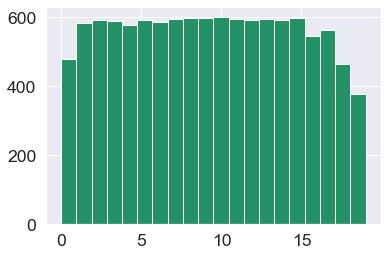

In [41]:
plt.hist(X.target, bins = 20)
None

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.